# Classifying of appropriate dataset with clusters using support vector machines (SVM)

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np

from sklearn import svm

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import seaborn as sns; sns.set(font_scale = 1.2)
    
%matplotlib inline

In [2]:
# loading in the glass dataset
data2 = pd.read_csv('HW1\\GlassDataset.csv')

data2.head(n=2)

,RefractiveIndex,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1


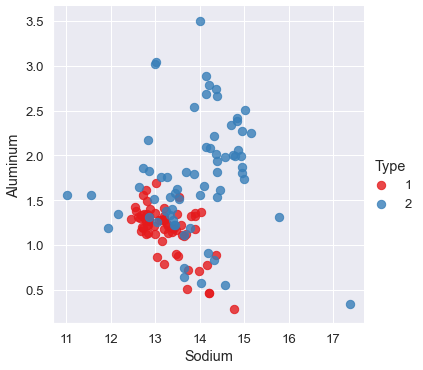

In [4]:
# visualize the data in an sns plot using aluminum and sodium to predict glass type
sns.lmplot(x = 'Sodium', y = 'Aluminum', data = data2, hue = 'Type', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});

# No clear seperation of data points, inserting a hyperplane will not be appropriate using the glass dataset

In [6]:
# Loading another dataset, i.e fruit dataset
data3 = pd.read_csv('Spring2021\\CS_5046\\FruitDataset.csv')

data3.head(n=2)

,fruit_label,fruit_name,fruit_subtype,mass,width,height
0,1,apple,granny_smith,192,8.4,7.3
1,1,apple,granny_smith,180,8.0,6.8


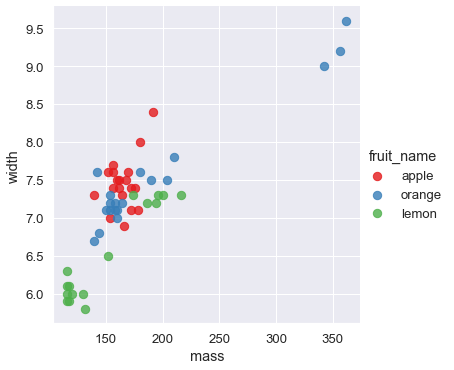

In [7]:
# visualize the data in an sns plot using fruit width and mass to determine fruit name
sns.lmplot(x = 'mass', y = 'width', data = data3, hue = 'fruit_name', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});

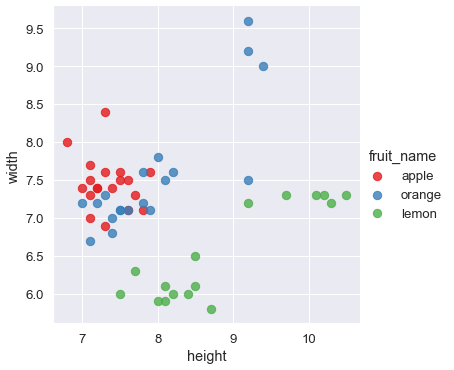

In [8]:
# visualize the data in an sns plot using fruit width and height to determine fruit name
sns.lmplot(x = 'height', y = 'width', data = data3, hue = 'fruit_name', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});

# same problem of mixed-clusters with the fruit dataset

In [9]:
# Loading in the iris dataset
data4 = pd.read_csv('Spring2021\\CS_5046\\iris.csv')

data4.head(n=2)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


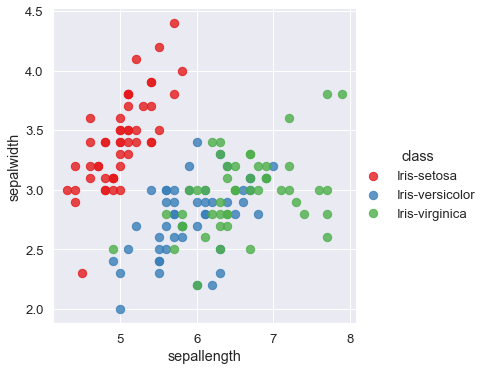

In [10]:
sns.lmplot(x = 'sepallength', y = 'sepalwidth', data = data4, hue = 'class', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});

# The sns plots show possible clusters of flower class, for two features-two class-classification

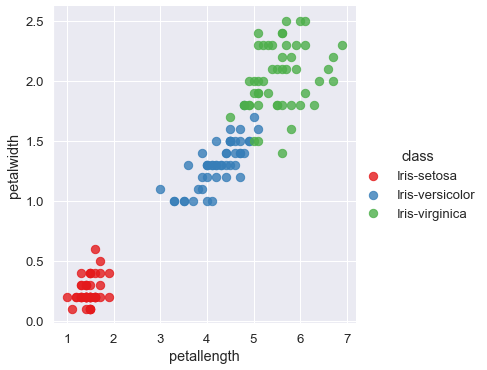

In [11]:
sns.lmplot(x = 'petallength', y = 'petalwidth', data = data4, hue = 'class', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});

In [12]:
# Creating a subset of the dataset with only two classes of flowers
dataSubset = data4.loc[data4['class'].isin(['Iris-setosa','Iris-virginica'])]
print(dataSubset.shape)

(100, 5)


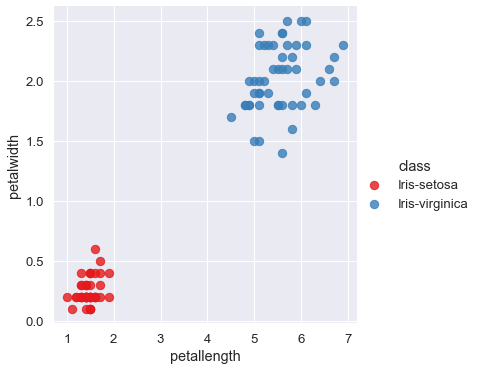

In [13]:
# clear cluster pattern displayed here
sns.lmplot(x = 'petallength', y = 'petalwidth', data = dataSubset, hue = 'class', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});

In [14]:
# Encoding the class label 
y = np.where(dataSubset['class']== 'Iris-setosa', 0, 1) # flower is iris-setosa or not

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# Seperating the features from the whole data-subset
X = dataSubset.drop('class', axis = 1)

used_features = X[['petallength', 'petalwidth']].values # getting the values of the 2 features

print(used_features)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [6.  2.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.6 1.8]
 [5.8 2.2]
 [6.6 2.1]
 [4.5 1.7]
 [6.3 1.8]
 [5.8 1.8]
 [6.1 2.5]
 [5.1 2. ]
 [5.3 1.9]
 [5.5 2.1]
 [5.  2. ]
 [5.1 2.4]
 [5.3 2.3]
 [5.5 1.8]
 [6.7 2.2]
 [6.9 2.3]
 [5.  1.5]
 [5.7 2.3]
 [4.9 2. ]
 [6.7 2. ]
 [4.9 1.8]
 [5.7 2.1]
 [6.  1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.6 2.1]
 [5.8 1.6]
 [6.1 1.9]
 [6.4 2. ]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]
 [6.1 2.3]
 [5.6 2.4]
 [5.5 1.8]
 [4.8 1.8]
 [5.4 2.1]
 [5.6 2.4]

In [16]:
# Creating an instance of the class and fiiting the model
model = svm.SVC(kernel = 'linear')
model.fit(used_features, y)

SVC(kernel='linear')

In [17]:
# we get the seperating hyperplane, i.e the math behind the algorithm
w = model.coef_[0]
m = -w[0] / w[1] # generates the slope
xx = np.linspace(0, 10) # creating a line of x values between 0 and 10

# multiplying m across each value in the numpy array, and then subtracting the model intercept
yy = m*xx - (model.intercept_[0] / w[1]) # line equation: y = mx + c

# Plot the parallels to the separating hyperplane that pass through the support vectors
a = model.support_vectors_[0]
yy_down = m*xx + (a[1] - m*a[0])

a = model.support_vectors_[-1]
yy_up = m*xx + (a[1] - m*a[0])

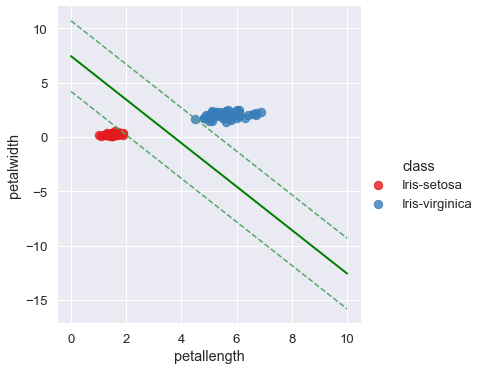

In [22]:
sns.lmplot(x = 'petallength', y= 'petalwidth', data = dataSubset, hue = 'class', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});
plt.plot(xx, yy, linewidth=2, color='green')

plt.plot(xx, yy_down, 'g--')
plt.plot(xx, yy_up, 'g--')

In [23]:
# a function to predict if the flower class is setosa or virginica, using the petal-length and petal-width features
def flower_type(plength, pwidth):
    if(model.predict([[plength, pwidth]])) == 0:
        print('This flower class is Iris setosa!')
    else:
        print('This flower class is Iris vriginica')
        
        
        
flower_type(0.5, 1)

This flower class is Iris setosa!


In [24]:
flower_type(4, 6)

This flower class is Iris vriginica


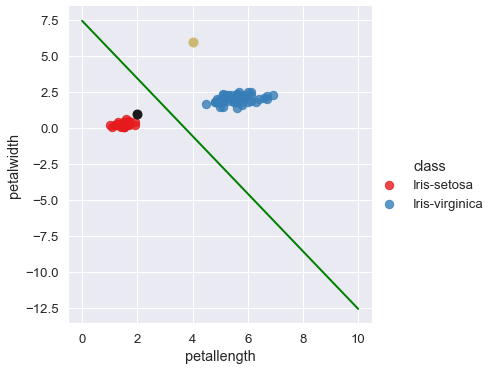

In [50]:
sns.lmplot(x = 'petallength', y = 'petalwidth', data = dataSubset, hue = 'class', 
           palette = 'Set1', fit_reg = False, scatter_kws = {"s":70});
plt.plot(xx, yy, linewidth=2, color='green')

plt.plot(2, 1, 'ko',  markersize = '9')
plt.plot(4, 6, 'yo',  markersize = '9')

# Clear classification of the two new points as iris-setosa and iris-virginica, using svm hyperplane